<a href="https://colab.research.google.com/github/ashishsumanth1/Data-Analysis-/blob/main/Project_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census 2021 Data Analysis

This notebook analyzes the Census 2021 data to uncover insights about the population distribution, growth trends, and demographic patterns.


Imports


In [ ]:
import numpy as np # A useful package for dealing with mathematical processes
import sklearn.datasets # sklearn is an important package for much of the ML
import pandas as pd # a common package for viewing tabular data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats

Data Loading

In [ ]:
from google.colab import files
# Upload and load qualification data
uploaded = files.upload()
qualification_df =pd.read_csv('qualification for electro.csv')

# Upload and load occupation data
uploaded = files.upload()
occupation_df =pd.read_csv('occupation for electro.csv')

# Upload and load economy data
uploaded = files.upload()
eco_df =pd.read_csv('eco for electro.csv')

# Upload and load age data
uploaded = files.upload()
age_df = pd.read_csv('age for electro.csv')

Saving qualification for electro.csv to qualification for electro (1).csv


## Data Preprocessing

Preprocessing the data to make it suitable for analysis.


Pivot Tables Creation
In this section, we create pivot tables to summarize our datasets by electoral wards and divisions. Pivot tables are a powerful data summarization tool in pandas, allowing us to reorganize and aggregate our data efficiently.

In [ ]:
pivot_qualification_df = pd.pivot_table(qualification_df,index=['Electoral wards and divisions Code'], columns='Highest level of qualification (8 categories)',values='Observation')
pivot_occupation_df = occupation_df.pivot_table(index=['Electoral wards and divisions Code'], columns='Occupation (current) (10 categories)', values='Observation', aggfunc='sum')
pivot_eco_df= eco_df.pivot_table(index=['Electoral wards and divisions Code'], columns='Economic activity status last week (3 categories)', values='Observation', aggfunc='sum')
pivot_age_df  = pd.pivot_table(age_df ,index=['Electoral wards and divisions Code'],columns='Age (6 categories)',values='Observation')

Renaming Columns for Qualification Data Pivot Table

After creating the pivot table for the qualification data, we rename its columns to more concise and readable labels. This helps in simplifying the analysis and interpretation of the data.

In [ ]:
pivot_qualification_df .rename(columns={
    'Apprenticeship':'Apprenticeship',
    'No qualifications':'No qualifications',
    'Level 1 and entry level qualifications: 1 to 4 GCSEs grade A* to C, Any GCSEs at other grades, O levels or CSEs (any grades), 1 AS level, NVQ level 1, Foundation GNVQ, Basic or Essential Skills':'Level 1',
    'Level 2 qualifications: 5 or more GCSEs (A* to C or 9 to 4), O levels (passes), CSEs (grade 1), School Certification, 1 A level, 2 to 3 AS levels, VCEs, Intermediate or Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First or General Diploma, RSA Diploma':'Level 2',
    'Level 3 qualifications: 2 or more A levels or VCEs, 4 or more AS levels, Higher School Certificate, Progression or Advanced Diploma, Welsh Baccalaureate Advance Diploma, NVQ level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma':'Level 3',
    'Level 4 qualifications or above: degree (BA, BSc), higher degree (MA, PhD, PGCE), NVQ level 4 to 5, HNC, HND, RSA Higher Diploma, BTEC Higher level, professional qualifications (for example, teaching, nursing, accountancy)':'Level 4',
    'Other: vocational or work-related qualifications, other qualifications achieved in England or Wales, qualifications achieved outside England or Wales (equivalent not stated or unknown)':'Other'

}, inplace=True)

**Merging Pivot Tables**

After creating individual pivot tables for qualification, occupation, economic activity, and age data, we need to combine them into a single DataFrame for a comprehensive analysis. This merging process will help us correlate and analyze data across different dimensions.

**Merging DataFrames**

We merge the pivot tables on the common index, "Electoral wards and divisions Code". This will result in a single DataFrame (merged_df) containing all the information.

In [ ]:
# Step 1: Merge the DataFrames on the "Electoral wards and divisions" index
merged_df = pivot_qualification_df.merge(pivot_occupation_df, on="Electoral wards and divisions Code")
merged_df = merged_df.merge(pivot_eco_df, on="Electoral wards and divisions Code")
merged_df = merged_df.merge(pivot_age_df , on="Electoral wards and divisions Code")
# Now, the merged_df will have all the columns from both DataFrames, merged on the "Electoral wards and divisions" index
merged_df

In [ ]:
# Reset the index
merged_df = merged_df.reset_index()

**Adding Employment Rate and Employment Status**

We calculate the employment rate for each electoral ward and division by using the 'Employed' and 'Not employed' columns. We also create a binary target variable, 'EmploymentStatus', which indicates whether the employment rate is above a certain threshold.

**Creating Employment Rate**

First, we create a new column, EmploymentRate, which is calculated as the ratio of employed individuals to the total population (employed + not employed).

In [ ]:
# Create a new column for employment rate
merged_df ['EmploymentRate'] =merged_df ['Employed'] / (merged_df ['Employed'] + merged_df ['Not employed'])

# binary target variable 'EmploymentStatus'
threshold = 0.5
merged_df ['EmploymentStatus'] = (merged_df ['EmploymentRate'] > threshold).astype(int)


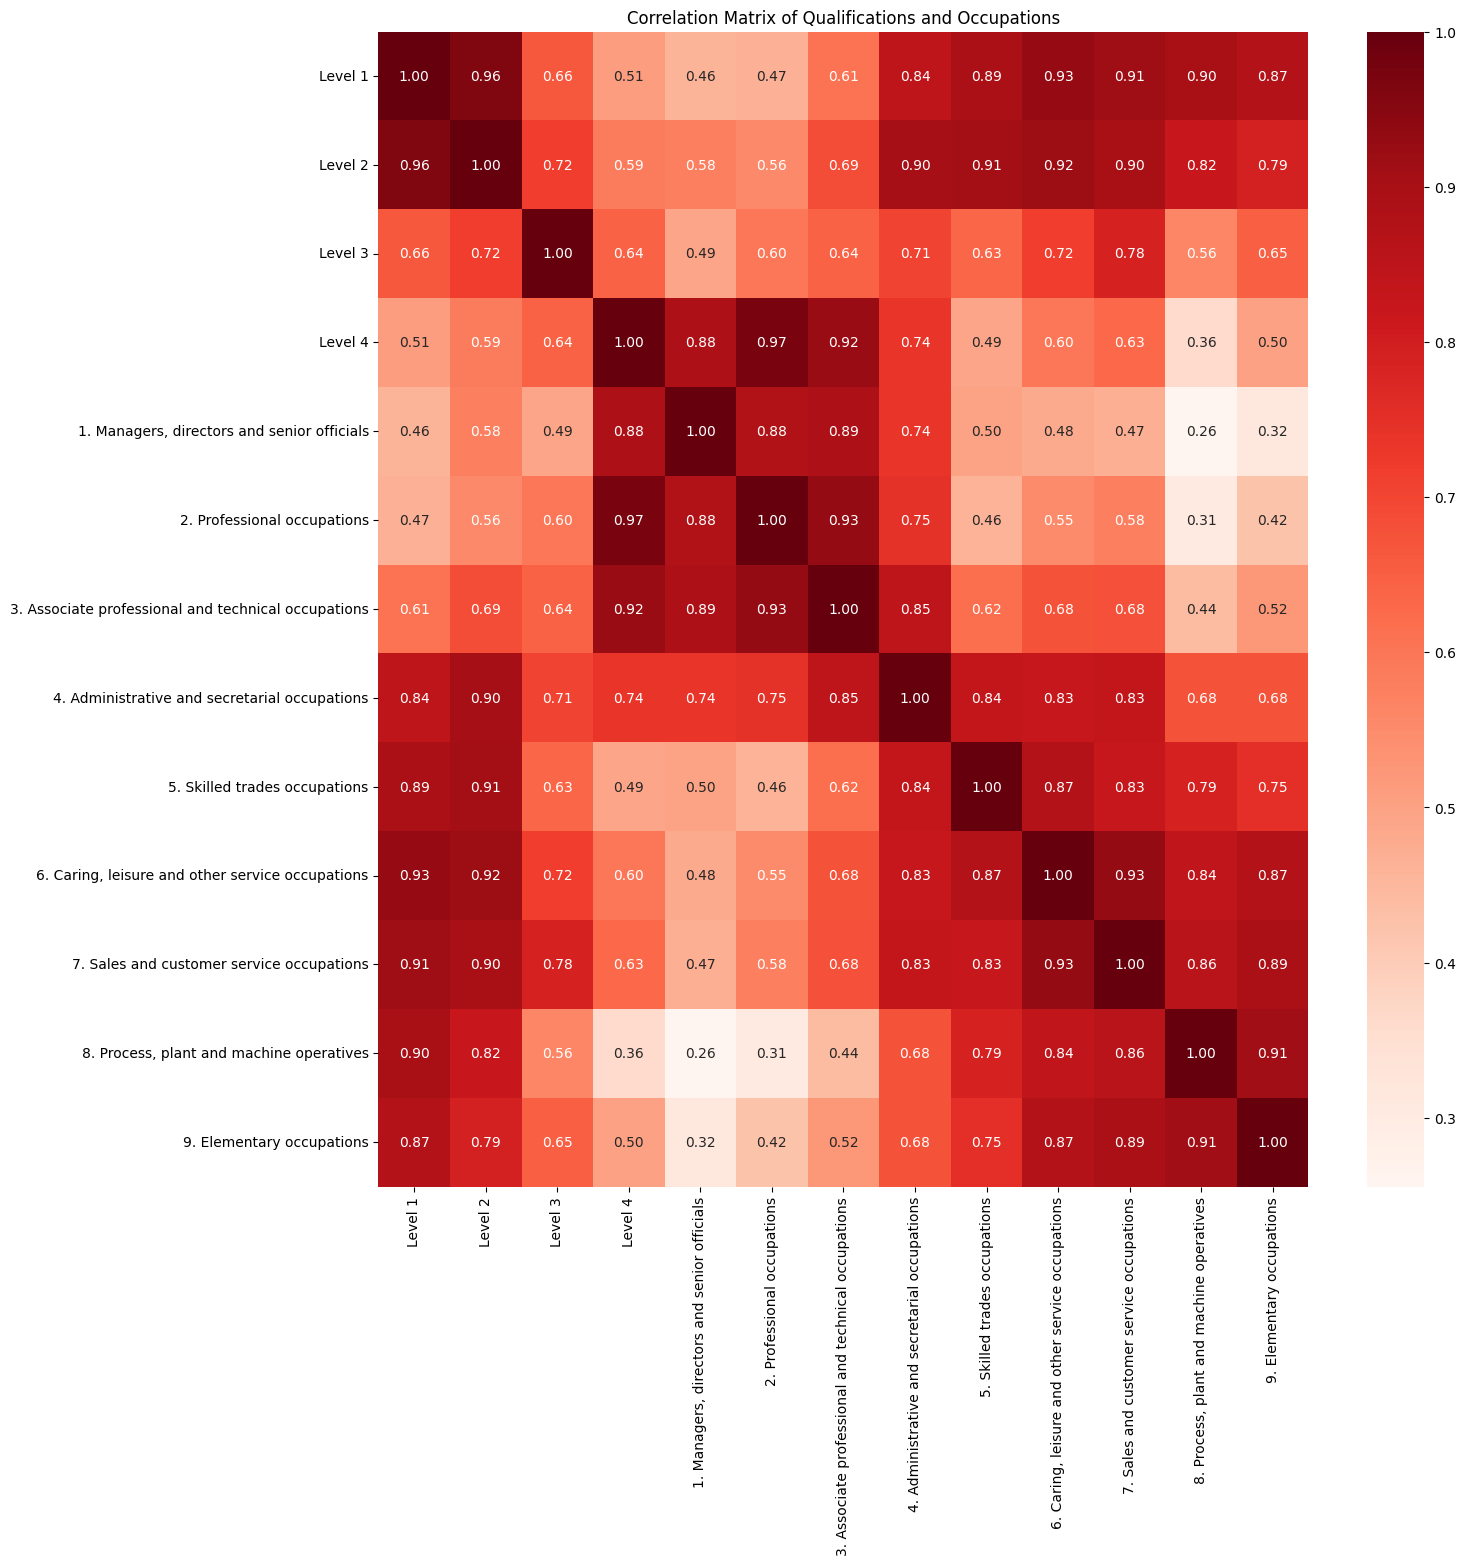

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'merged_df'
correlation_cols = ['Level 1', 'Level 2', 'Level 3', 'Level 4',
                    '1. Managers, directors and senior officials',
                    '2. Professional occupations',
                    '3. Associate professional and technical occupations',
                    '4. Administrative and secretarial occupations',
                    '5. Skilled trades occupations',
                    '6. Caring, leisure and other service occupations',
                    '7. Sales and customer service occupations',
                    '8. Process, plant and machine operatives',
                    '9. Elementary occupations']

correlation_matrix = merged_df[correlation_cols].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds, fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Qualifications and Occupations')
plt.show()
import plotly.express as px

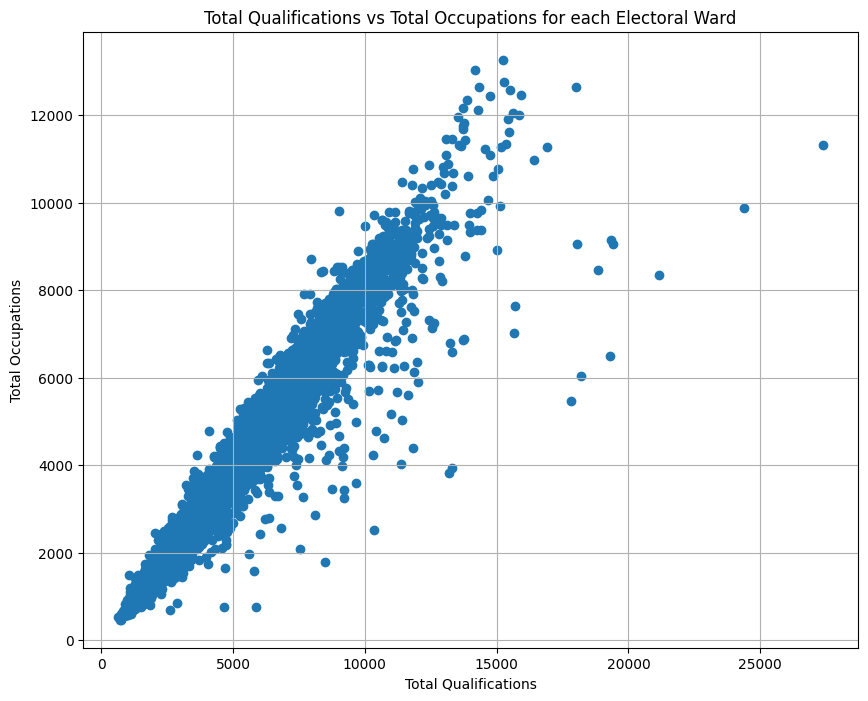

In [ ]:
# Calculate the total occupations and total qualifications for each ward
merged_df['total_occupations'] = merged_df[['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives', '9. Elementary occupations']].sum(axis=1)
merged_df['total_qualifications'] = merged_df[['Level 1', 'Level 2', 'Level 3', 'Level 4']].sum(axis=1)

# Generate the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(merged_df['total_qualifications'], merged_df['total_occupations'])
plt.xlabel('Total Qualifications')
plt.ylabel('Total Occupations')
plt.title('Total Qualifications vs Total Occupations for each Electoral Ward')
plt.grid(True)
plt.show()

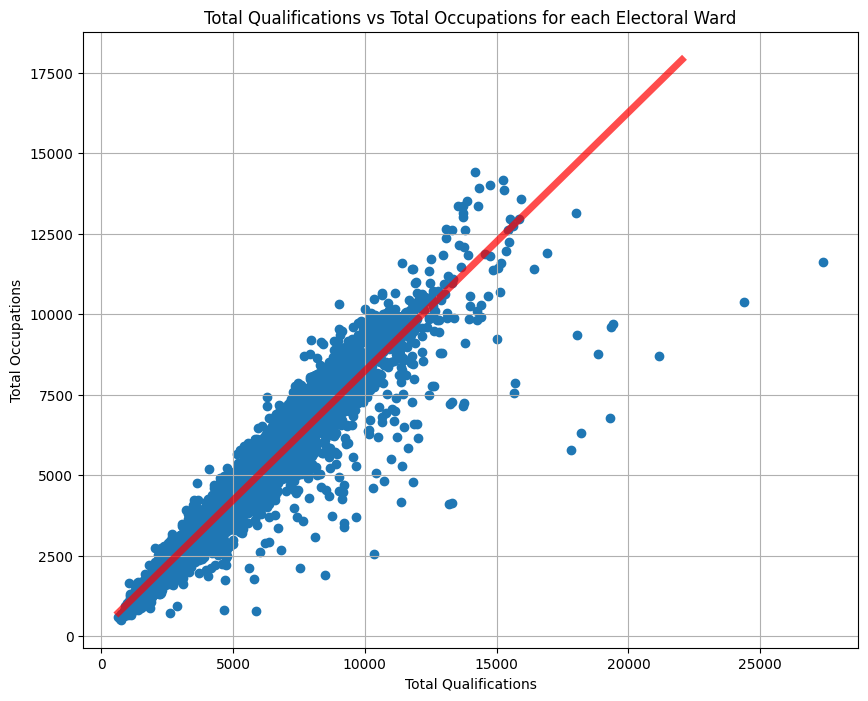

In [ ]:
# Calculate the total occupations and total qualifications for each ward
merged_df['total_occupations'] = merged_df[['Apprenticeship','1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives', '9. Elementary occupations']].sum(axis=1)
merged_df['total_qualifications'] = merged_df[['Level 1', 'Level 2', 'Level 3', 'Level 4']].sum(axis=1)


# Generate the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(merged_df['total_qualifications'], merged_df['total_occupations'])

# Calculation the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['total_qualifications'], merged_df['total_occupations'])

start = merged_df['total_qualifications'].min()
end = start + (merged_df['total_qualifications'].max() - start) * 0.8


line_x = np.linspace(start, end, 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='r', alpha=0.7, lw=5)

plt.xlabel('Total Qualifications')
plt.ylabel('Total Occupations')
plt.title('Total Qualifications vs Total Occupations for each Electoral Ward')
plt.grid(True)
plt.show()


In [ ]:
# Filtering wards
filtered_wards = merged_df[(merged_df['total_occupations'] > 10000) & (merged_df['total_qualifications'] > 10000)]

# Displaying the number of wards that meet the criteria
print(f"There are {len(filtered_wards)} wards with more than 10,000 total occupations and qualifications.")


There are 102 wards with more than 10,000 total occupations and qualifications.


In [ ]:
# Most common qualifications
common_qualifications = filtered_wards[['Level 1', 'Level 2', 'Level 3', 'Level 4']].mean().sort_values(ascending=False)
# Most common occupations
common_occupations = filtered_wards[['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives', '9. Elementary occupations']].mean().sort_values(ascending=False)

print("Most Common Qualifications:")
print(common_qualifications)
print("\nMost Common Occupations:")
print(common_occupations)


In [ ]:
filtered_wards_2 = merged_df[(merged_df['total_occupations'] > 6000) & (merged_df['total_occupations'] <= 10000) & (merged_df['total_qualifications'] > 5000)]

In [ ]:
# Most common qualifications
common_qualifications = filtered_wards_2[['Level 1', 'Level 2', 'Level 3', 'Level 4']].mean().sort_values(ascending=False)

# Most common occupations
common_occupations = filtered_wards_2[['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives', '9. Elementary occupations']].mean().sort_values(ascending=False)

print("Most Common Qualifications:")
print(common_qualifications)
print("\nMost Common Occupations:")
print(common_occupations)

In [ ]:
# Calculate total population for each ward
merged_df['Total Population'] = merged_df[['Apprenticeship','No qualifications', 'Level 1', 'Level 2', 'Level 3', 'Level 4','Does not apply_x','Other']].sum(axis=1)

# Calculate the ratio of "No Qualification" to the total population for each ward
merged_df['No Qualification Ratio'] = merged_df['No qualifications'] / merged_df['Total Population']

# Sort the dataframe by 'No Qualification Ratio' in descending order to identify areas with the highest percentages
top_wards = merged_df.sort_values(by='No Qualification Ratio', ascending=False)

print(top_wards[['Electoral wards and divisions Code', 'No Qualification Ratio']])

In [ ]:
threshold_ratio = merged_df['No Qualification Ratio'].mean()
high_no_qualification_ratio_wards = merged_df[merged_df['No Qualification Ratio'] > threshold_ratio]
high_no_qualification_ratio_wards

In [ ]:
# Sorting the dataframe based on the "No Qualification Ratio" in descending order
top_wards = merged_df.sort_values(by='No Qualification Ratio', ascending=False).head(1000)

# Extracting the employment rate for these wards
employment_rates_top_wards = top_wards['EmploymentRate']

# Optionally, for comparison:
bottom_wards = merged_df.sort_values(by='No Qualification Ratio', ascending=True).head(1000)
employment_rates_bottom_wards = bottom_wards['EmploymentRate']

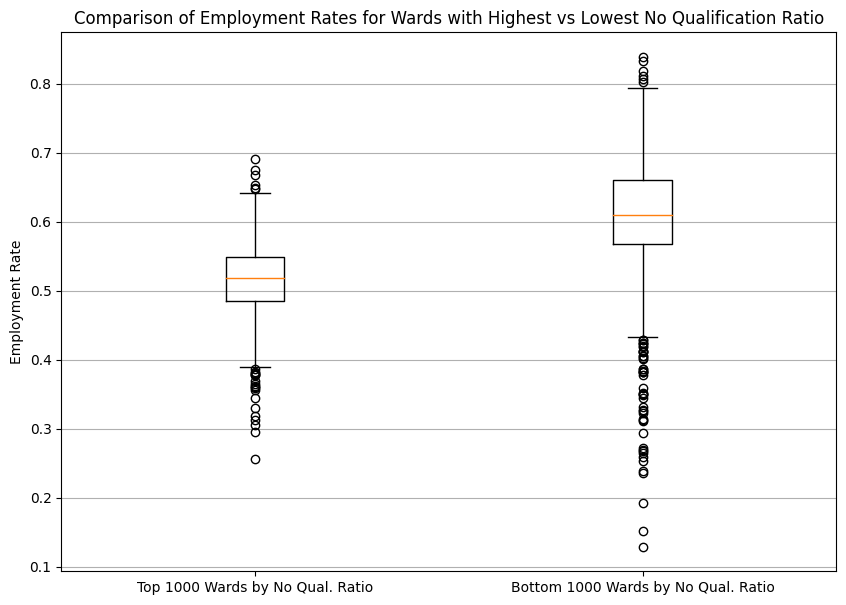

In [ ]:
import matplotlib.pyplot as plt

# Data extraction based on previous steps
top_wards = merged_df.sort_values(by='No Qualification Ratio', ascending=False).head(1000)
employment_rates_top_wards = top_wards['EmploymentRate']

bottom_wards = merged_df.sort_values(by='No Qualification Ratio', ascending=True).head(1000)
employment_rates_bottom_wards = bottom_wards['EmploymentRate']

# Creating a box plot
data_to_plot = [employment_rates_top_wards, employment_rates_bottom_wards]
labels = ['Top 1000 Wards by No Qual. Ratio', 'Bottom 1000 Wards by No Qual. Ratio']

plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=labels)
plt.ylabel('Employment Rate')
plt.title('Comparison of Employment Rates for Wards with Highest vs Lowest No Qualification Ratio')
plt.grid(axis='y')
plt.show()


In [ ]:
# Total number of employed individuals across all wards
total_employed = merged_df['Employed'].sum()

# Initialize a dictionary to store results
percentage_employed_with_qualification = {}

for level in ['Level 1', 'Level 2', 'Level 3', 'Level 4']:
    total_with_qualification = merged_df[level].sum()  # Total people with the qualification
    percentage = (total_with_qualification / total_employed) * 100
    percentage_employed_with_qualification[level] = percentage

for level, percentage in percentage_employed_with_qualification.items():
    print(f"Percentage of employed individuals with {level} out of all employed: {percentage:.2f}%")



Percentage of employed individuals with Level 1 out of all employed: 16.85%
Percentage of employed individuals with Level 2 out of all employed: 23.38%
Percentage of employed individuals with Level 3 out of all employed: 29.62%
Percentage of employed individuals with Level 4 out of all employed: 59.10%


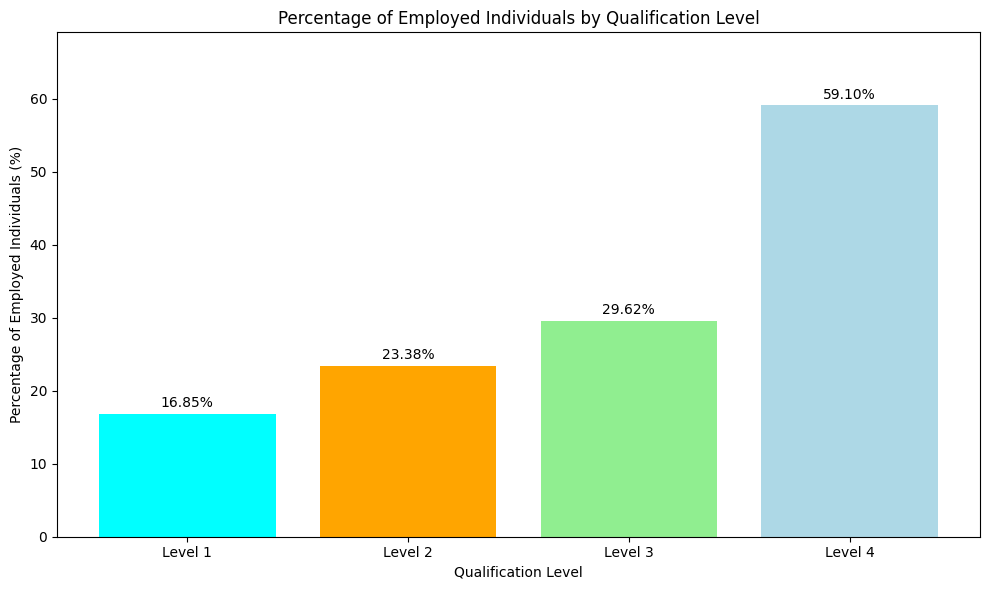

In [ ]:
# Extract data from the dictionary
levels = list(percentage_employed_with_qualification.keys())
percentages = list(percentage_employed_with_qualification.values())

# Defining a color list for each qualification level
colors = ['cyan', 'orange', 'lightgreen', 'lightblue']

# Creating a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(levels, percentages, color=colors)
plt.xlabel('Qualification Level')
plt.ylabel('Percentage of Employed Individuals (%)')
plt.title('Percentage of Employed Individuals by Qualification Level')
plt.ylim(0, max(percentages) + 10)

# Adding percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
# 1. Top 3 Electoral Wards for 'Managers, Directors and Senior Officials' Occupation
top_wards_occupation = merged_df[['1. Managers, directors and senior officials']].sort_values(by='1. Managers, directors and senior officials', ascending=False).head(3)

# 2. Top 3 Electoral Wards for People with 'Level 4' Qualifications
top_wards_qualification = merged_df[['Level 4']].sort_values(by='Level 4', ascending=False).head(3)

# 3. Qualification and Occupation Dynamics - focusing on Professional Occupations and Level 2
professional_wards = merged_df[merged_df['2. Professional occupations'] > merged_df['2. Professional occupations'].mean()]
top_wards_engineering = professional_wards[['Level 2']].sort_values(by='Level 2', ascending=False).head(3)

# Aggregating qualifications
classroom_based_levels = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
classroom_total = merged_df[classroom_based_levels].sum().sum()
apprenticeship_based = merged_df['Apprenticeship'].sum()

percent_classroom = (classroom_total / (classroom_total + apprenticeship_based)) * 100
percent_apprenticeship = 100 - percent_classroom

# Printing the insights
print("Top 3 Electoral Wards for 'Managers, Directors and Senior Officials' Occupation:")
print(top_wards_occupation)

print("\nTop 3 Electoral Wards for People with 'Level 4' Qualifications:")
print(top_wards_qualification)

print("\nTop Electoral Wards with Professional Occupations having 'Level 2' Qualifications:")
print(top_wards_engineering)

print(f"\nPercentage of people with classroom-based qualifications: {percent_classroom:.2f}%")
print(f"Percentage of people with apprenticeship-based qualifications: {percent_apprenticeship:.2f}%")


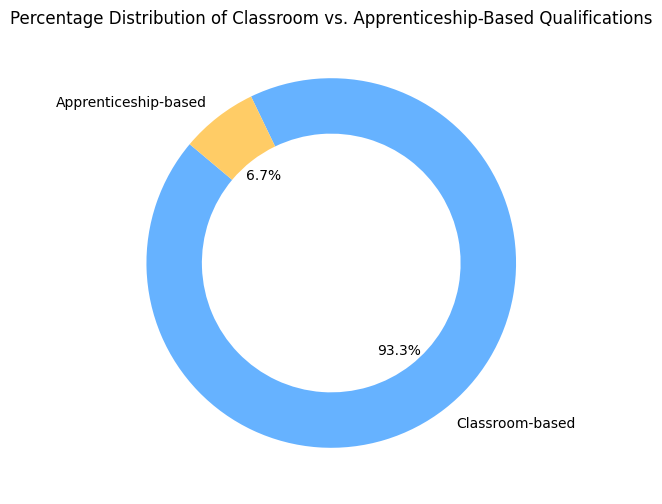

In [ ]:
# 4. Percentage Distribution of Classroom vs. Apprenticeship-Based Qualifications:
labels = ['Classroom-based', 'Apprenticeship-based']
sizes = [percent_classroom, percent_apprenticeship]
colors = ['#66b2ff', '#ffcc66']
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title("Percentage Distribution of Classroom vs. Apprenticeship-Based Qualifications")
plt.show()


In [ ]:
qualification_columns = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
occupation_columns = ['1. Managers, directors and senior officials', '2. Professional occupations',
                      '3. Associate professional and technical occupations',
                      '4. Administrative and secretarial occupations','5. Skilled trades occupations',
                      '6. Caring, leisure and other service occupations',
                      '7. Sales and customer service occupations',
                      '8. Process, plant and machine operatives','9. Elementary occupations']

In [ ]:
# Group by 'ward' and sum up the counts
wards_grouped = merged_df.groupby('Electoral wards and divisions Code').sum()

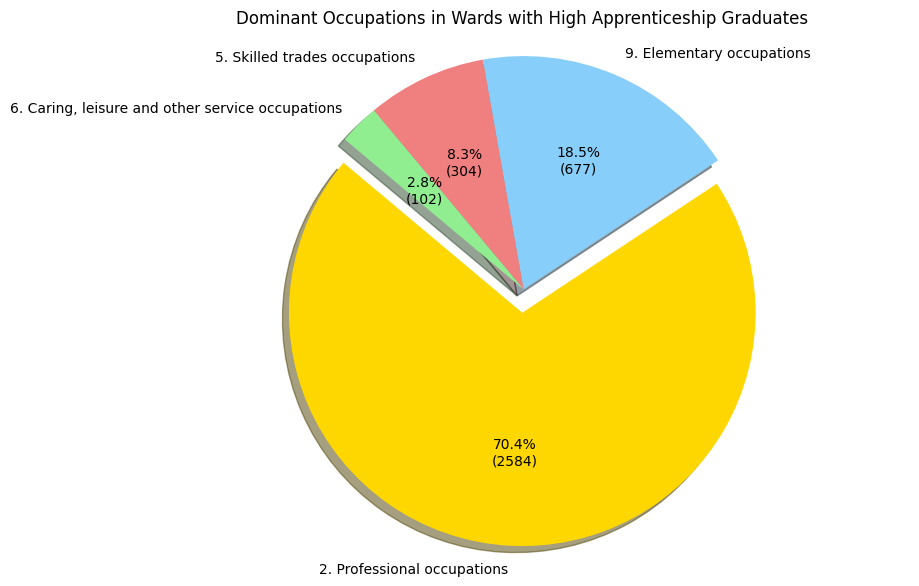

In [ ]:
labels = ["2. Professional occupations",
          "9. Elementary occupations",
          "5. Skilled trades occupations",
          "6. Caring, leisure and other service occupations"]
sizes = [2585, 678, 304, 103]
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0, 0)

# Function to format label with count and percentage
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot
plt.figure(figsize=(10,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct=lambda pct: func(pct, sizes), shadow=True, startangle=140)

plt.axis('equal')
plt.title('Dominant Occupations in Wards with High Apprenticeship Graduates')
plt.show()


In [ ]:
high_qualification_wards = merged_df[merged_df['Level 4'] > merged_df['Level 4'].quantile(0.75)]  # Top 25% wards by Level 4 qualifications
high_profession_wards = high_qualification_wards[high_qualification_wards['2. Professional occupations'] > high_qualification_wards['2. Professional occupations'].quantile(0.75)]  # Of those, top 25% by professional occupations


In [ ]:
# Getting the common electoral wards
common_wards = high_qualification_wards.index.intersection(high_profession_wards.index)

# Filtering out these common wards from the original dataframe for detailed inspection
common_wards_df = merged_df.loc[common_wards]


In [ ]:
common_wards_avg_employment = common_wards_df['EmploymentRate'].mean()


In [ ]:
low_qualification_wards = merged_df.nsmallest(int(0.10 * len(merged_df)), 'Level 4')
low_profession_wards = merged_df.nsmallest(int(0.10 * len(merged_df)), '2. Professional occupations')

# Getting the common low wards
low_common_wards = low_qualification_wards.index.intersection(low_profession_wards.index)

low_common_wards_df = merged_df.loc[low_common_wards]

low_common_wards_avg_employment = low_common_wards_df['EmploymentRate'].mean()


In [ ]:
print(f"Average Employment Rate in High Performing Wards: {common_wards_avg_employment:.2f}%")
print(f"Average Employment Rate in Low Performing Wards: {low_common_wards_avg_employment:.2f}%")


Average Employment Rate in High Performing Wards: 0.62%
Average Employment Rate in Low Performing Wards: 0.53%


In [ ]:
# Label the dataframes for identification in the plot
common_wards_df['Ward Type'] = 'High Performing'
low_common_wards_df['Ward Type'] = 'Low Performing'

# Concatenate the data
plot_df = pd.concat([common_wards_df, low_common_wards_df])


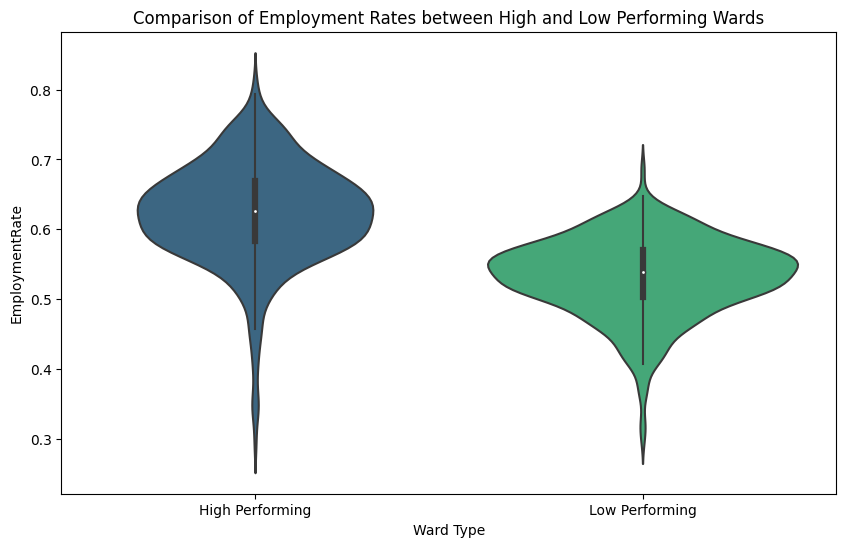

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ward Type', y='EmploymentRate', data=plot_df, palette='viridis')
plt.title('Comparison of Employment Rates between High and Low Performing Wards')
plt.show()

In [ ]:
# Step 1: Calculate total qualifications for each level
merged_df['Total_Qualifications_Level4'] = merged_df['Level 4']
merged_df['Total_Qualifications_Level3'] = merged_df['Level 3']
merged_df['Total_Qualifications_Level2'] = merged_df['Level 2']
merged_df['Total_Qualifications_Level1'] = merged_df['Level 1']

# Calculate total occupations corresponding to each qualification level
merged_df['Total_Occupations_Level4'] = merged_df[['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives']].sum(axis=1)
merged_df['Total_Occupations_Level3'] = merged_df[['3. Associate professional and technical occupations', '4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives']].sum(axis=1)
merged_df['Total_Occupations_Level2'] = merged_df[['4. Administrative and secretarial occupations', '5. Skilled trades occupations', '6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives']].sum(axis=1)
merged_df['Total_Occupations_Level1'] = merged_df[['6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '8. Process, plant and machine operatives', '9. Elementary occupations']].sum(axis=1)

# Step 2: Calculate the difference (demand-supply gap)
merged_df['Demand_Supply_Gap_Level4'] = merged_df['Total_Qualifications_Level4'] - merged_df['Total_Occupations_Level4']
merged_df['Demand_Supply_Gap_Level3'] = merged_df['Total_Qualifications_Level3'] - merged_df['Total_Occupations_Level3']
merged_df['Demand_Supply_Gap_Level2'] = merged_df['Total_Qualifications_Level2'] - merged_df['Total_Occupations_Level2']
merged_df['Demand_Supply_Gap_Level1'] = merged_df['Total_Qualifications_Level1'] - merged_df['Total_Occupations_Level1']

# Step 3: Plot the differences
# (Continues as per your original visualization steps)

# Step 3: Plot the differences
fig1 = px.bar(merged_df, x='Electoral wards and divisions Code', y='Demand_Supply_Gap_Level4', color='Demand_Supply_Gap_Level4', title="Demand-Supply Gap in Each Ward for Level 4", labels={'Demand_Supply_Gap_Level4': 'Demand-Supply Gap', 'Electoral wards and divisions Code': 'Ward Code'})
fig1.show()

fig2 = px.bar(merged_df, x='Electoral wards and divisions Code', y='Demand_Supply_Gap_Level3', color='Demand_Supply_Gap_Level3', title="Demand-Supply Gap in Each Ward for Level 3", labels={'Demand_Supply_Gap_Level3': 'Demand-Supply Gap', 'Electoral wards and divisions Code': 'Ward Code'})
fig2.show()

fig3 = px.bar(merged_df, x='Electoral wards and divisions Code', y='Demand_Supply_Gap_Level2', color='Demand_Supply_Gap_Level2', title="Demand-Supply Gap in Each Ward for Level 2", labels={'Demand_Supply_Gap_Level2': 'Demand-Supply Gap', 'Electoral wards and divisions Code': 'Ward Code'})
fig3.show()

fig4 = px.bar(merged_df, x='Electoral wards and divisions Code', y='Demand_Supply_Gap_Level1', color='Demand_Supply_Gap_Level1', title="Demand-Supply Gap in Each Ward for Level 1", labels={'Demand_Supply_Gap_Level1': 'Demand-Supply Gap', 'Electoral wards and divisions Code': 'Ward Code'})
fig4.show()



In [ ]:
import plotly.graph_objects as go

# Converting the age_distribution to a DataFrame for better compatibility with Plotly
age_distribution_df = age_distribution.to_frame().reset_index()
age_distribution_df.columns = ['Age Group', 'Average Count']

# Create a Plotly figure
fig = go.Figure(
    data=go.Bar(
        x=age_distribution_df['Age Group'],
        y=age_distribution_df['Average Count'],
        hovertemplate='Average Count: %{y:.2f}<extra></extra>',
    )
)

fig.update_layout(
    title_text='Age Distribution in Low Employment Wards',
    xaxis_title='Age Group',
    yaxis_title='Average Count',
)

fig.show()


In [ ]:
# Converting the high_age_distribution to a DataFrame for better compatibility with Plotly
high_age_distribution_df = high_age_distribution.to_frame().reset_index()
high_age_distribution_df.columns = ['Age Group', 'Average Count']

# Create a Plotly figure
fig = go.Figure(
    data=go.Bar(
        x=high_age_distribution_df['Age Group'],
        y=high_age_distribution_df['Average Count'],
        hovertemplate='Average Count: %{y:.2f}<extra></extra>',
        marker_color='green'
    )
)


fig.update_layout(
    title_text='Age Distribution in High Employment Wards',
    xaxis_title='Age Group',
    yaxis_title='Average Count',
)

fig.show()


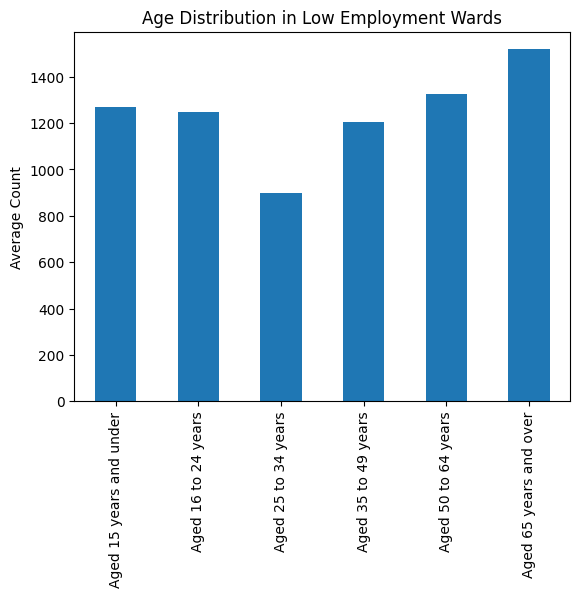

In [ ]:
employment_rate_threshold = 0.5
low_employment_df = merged_df[merged_df['EmploymentRate'] < employment_rate_threshold]

age_columns = ['Aged 15 years and under', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
               'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over']
age_distribution = low_employment_df[age_columns].mean()

age_distribution.plot(kind='bar')
plt.title('Age Distribution in Low Employment Wards')
plt.ylabel('Average Count')
plt.show()


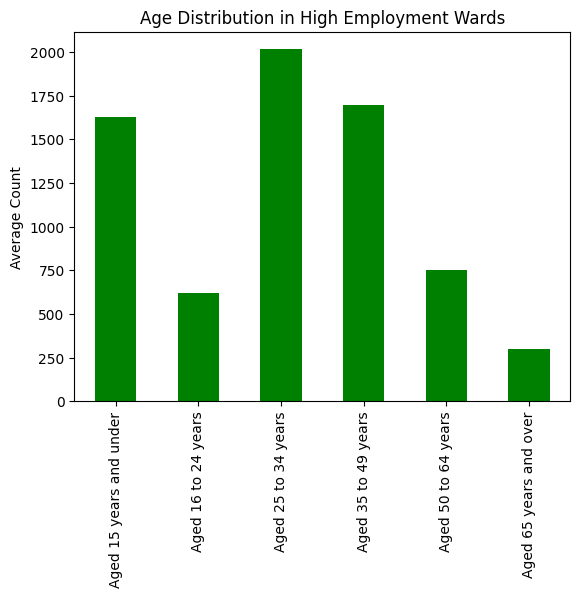

In [ ]:
high_employment_rate_threshold = 0.8
high_employment_df = merged_df[merged_df['EmploymentRate'] > high_employment_rate_threshold]

high_age_distribution = high_employment_df[age_columns].mean()
high_age_distribution.plot(kind='bar', color='green')
plt.title('Age Distribution in High Employment Wards')
plt.ylabel('Average Count')
plt.show()
